# Two Gaussians Test

Test of Hamiltonian Nested Sampling on a mixture of two Gaussians

In [1]:
# Imports
import numpy as np
import torch
from gradNS import Param, HamiltonianNS
from getdist import plots, MCSamples

/Users/pablo/miniconda3/envs/gns/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Number of dimensions of the problem
ndims = 5

# Define the two components
mvn1 = torch.distributions.MultivariateNormal(loc=-2*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

mvn2 = torch.distributions.MultivariateNormal(loc=2*torch.ones(ndims),
                                             covariance_matrix=torch.diag(
                                                 0.2*torch.ones(ndims)))

# Define the likelihood
def get_loglike(theta):
    return torch.logsumexp(torch.stack([mvn1.log_prob(theta), mvn2.log_prob(theta)]), dim=0, keepdim=False)

In [3]:
# Define the parameters for GradNS
params = []

for i in range(ndims):
    params.append(
        Param(
            name=f'p{i}',
            prior_type='Uniform',
            prior=(-5, 5),
            label=f'p_{i}')
    )

# Create a Nested Sampling object
ns = HamiltonianNS(
    nlive=25*len(params),
    loglike=get_loglike,
    params=params,
    verbose=True,
    clustering=True,
    tol=1e-1
)

In [4]:
# Run the sampler
ns.run()

---------------------------------------------
logZ = -52.1409, eps = 1.0052e+07
---------------------------------------------
Cluster 0 has volume fraction 1.0000 and logZp = -52.0688
---------------------------------------------
logZ = -32.4697, eps = 1.3315e+04
---------------------------------------------
Cluster 0 has volume fraction 0.4160 and logZp = -33.3029
Cluster 1 has volume fraction 0.5840 and logZp = -32.9637
Increasing dt to  0.05500000000000001
Increasing dt to  0.06050000000000001
---------------------------------------------
logZ = -22.8529, eps = 1.5087e+03
---------------------------------------------
Cluster 0 has volume fraction 0.4585 and logZp = -24.1336
Cluster 1 has volume fraction 0.5415 and logZp = -23.1240
---------------------------------------------
logZ = -17.3729, eps = 1.1311e+02
---------------------------------------------
Cluster 0 has volume fraction 0.5510 and logZp = -18.1295
Cluster 1 has volume fraction 0.4490 and logZp = -17.9384
--------------

In [5]:
# The true logZ is the inverse of the prior volume
print('True logZ = ', np.log(1 / 10**len(params)))
print('Number of evaluations', ns.get_like_evals())

True logZ =  -11.512925464970229
Number of evaluations 1678266


### Plot

Generate a plot of the true and sampled posteriors, using GetDist

Removed no burn in
Removed no burn in


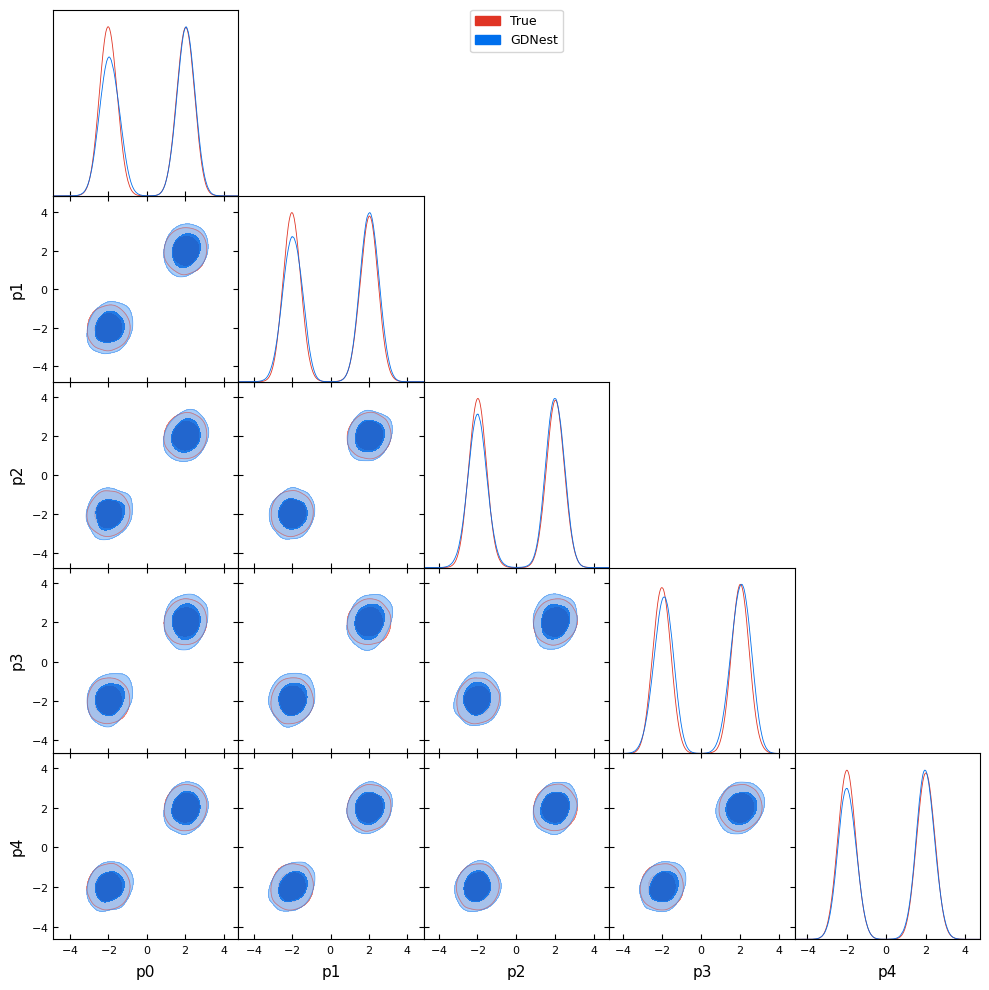

In [6]:
samples = ns.convert_to_getdist()
true_samples = torch.cat([mvn1.sample((5000,)), mvn2.sample((5000,))], dim=0)
true_samples = MCSamples(samples=true_samples.numpy(), names=[f'p{i}' for i in range(ndims)])
g = plots.get_subplot_plotter()
g.triangle_plot([true_samples, samples], [f'p{i}' for i in range(5)], filled=True, legend_labels=['True', 'GDNest'])